In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls')

**How many columns are there in the data?**

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
len(df.columns)

25

**How many rows are there in data?**

In [5]:
df['ID'].count()

30000

**Numbers of unique ID**

In [6]:
df['ID'].nunique()

29687

In [7]:
id_counts= df['ID'].value_counts()
id_counts

7fe414ae-32f8    2
994330b6-eeec    2
7c9b7473-cc2f    2
83d174e1-5f9a    2
06f377a6-ba7e    2
                ..
e687849d-b193    1
c80c1c77-99ba    1
6f5a52a7-6a81    1
851ff5bf-2747    1
7c911a28-78c2    1
Name: ID, Length: 29687, dtype: int64

In [8]:
dupe_mask= id_counts==2
dupe_mask

7fe414ae-32f8     True
994330b6-eeec     True
7c9b7473-cc2f     True
83d174e1-5f9a     True
06f377a6-ba7e     True
                 ...  
e687849d-b193    False
c80c1c77-99ba    False
6f5a52a7-6a81    False
851ff5bf-2747    False
7c911a28-78c2    False
Name: ID, Length: 29687, dtype: bool

**Duplicate ID**

In [9]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids

Index(['7fe414ae-32f8', '994330b6-eeec', '7c9b7473-cc2f', '83d174e1-5f9a',
       '06f377a6-ba7e', 'f37328b4-7b3a', '379e0b03-4ca0', '6353fd55-d66e',
       'd2a47fa6-0f6a', 'c361e43d-f1f4',
       ...
       '2f4f4bc9-fd55', 'edd737fd-5b07', 'c8bb762f-3ef9', '5ce60722-dbd1',
       '9389d6e1-e1a7', 'e77f7765-8731', '91084359-8bd4', 'f6032812-464e',
       'cb18af1f-3b53', 'ad819541-5d3c'],
      dtype='object', length=313)

In [10]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [11]:
((dupe_ids[:10]))

['7fe414ae-32f8',
 '994330b6-eeec',
 '7c9b7473-cc2f',
 '83d174e1-5f9a',
 '06f377a6-ba7e',
 'f37328b4-7b3a',
 '379e0b03-4ca0',
 '6353fd55-d66e',
 'd2a47fa6-0f6a',
 'c361e43d-f1f4']

In [12]:
df['ID'].isin(dupe_ids[:])

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: ID, Length: 30000, dtype: bool

In [13]:
df.loc[df['ID'].isin(dupe_ids[:]),:]['ID']

141      26bde6da-f148
196      42009c72-651f
241      26bde6da-f148
296      42009c72-651f
323      73ed1381-3a3f
             ...      
29685    ad23fe5c-7b09
29746    90330d02-82d9
29785    ad23fe5c-7b09
29875    97d1d2eb-c72f
29975    97d1d2eb-c72f
Name: ID, Length: 626, dtype: object

**Removing columns containing Missing Data**

In [14]:
df_zero_mask= df==0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [15]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
feature_zero_mask

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [16]:
sum(feature_zero_mask)

315

In [17]:
df.loc[feature_zero_mask,:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,73ed1381-3a3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,4f95b36b-ab10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,8d3a2576-a958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,f12b9d9e-ada0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29590,e7cd8c1a-88e9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [19]:
df_clean_1['ID'].nunique()

29685

**Missing Data in PAY_1**

In [20]:
np.unique(df_clean_1['PAY_1'] != 'Not available')

array([False,  True])

In [21]:
valid_pay_1_mask= df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask

0        True
1        True
2        True
3        True
4        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Name: PAY_1, Length: 29685, dtype: bool

In [22]:
len(valid_pay_1_mask)

29685

In [23]:
sum(valid_pay_1_mask)

26664

In [24]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
valid_pay_1_mask

0        True
1        True
2        True
3        True
4        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Name: PAY_1, Length: 29685, dtype: bool

**Converting datatype (object) of PAY_1 to int64**

In [25]:
df_clean_2.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [26]:
df_clean_2['PAY_1'].dtypes

dtype('O')

In [27]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2['PAY_1'].dtypes

dtype('int64')

**Exploring the Credit Limit and Demographic Features**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe27c3e5910>,
      dtype=object)

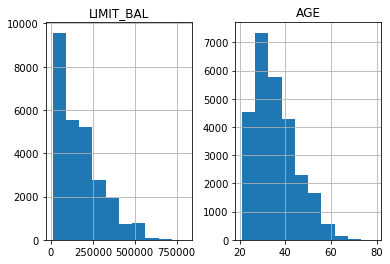

In [28]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [29]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


**Categorical Feature (EDUCATION)**

(1 = graduate school; 2 = university; 3 = high school; 4 = others)

In [30]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [31]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

**Categorical Feature (MARRIAGE)**

(1 = married; 2 = single; 3 = others)

In [32]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

**Default rate within education levels**

(It looks like a straight-line fit would probably not be the best description of the data here.)

Text(0.5, 0, 'Education level: ordinal encoding')

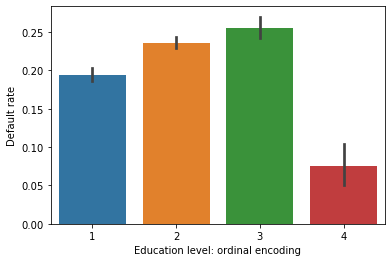

In [33]:
fig= sns.barplot(x='EDUCATION', y='default payment next month', data= df_clean_2)
fig.set_ylabel('Default rate')
fig.set_xlabel('Education level: ordinal encoding')

**Categorical Feature (EDUCATION)**

In [34]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [35]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [36]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [37]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [38]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [39]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

**Loading DataFrame from the CSV file we saved before**

In [40]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**Exploring the Financial History Features**

In [41]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [42]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [43]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [44]:
pay_feats

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

**Histograms for each PAY**

In [45]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

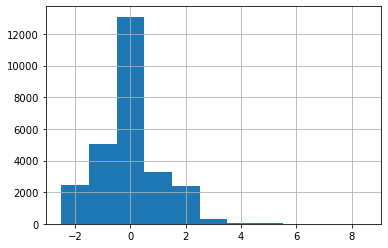

In [46]:
df[pay_feats]['PAY_1'].hist(bins=pay_1_bins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe27defa790>,
      dtype=object)

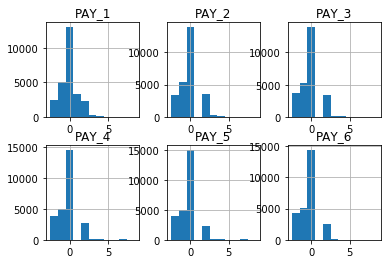

In [47]:
df[pay_feats].hist(bins=pay_1_bins,layout=(2,3))